### Student Information
Name: GUZMAN ALVAREZ Michael Daniel

Student ID:X1120075

GitHub ID: miguzz

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import sys
nltk.download('punkt')
sys.path.append('../helpers')
import data_mining_helpers as dmh
import sklearn
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/kali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Part 1

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [5]:
import pandas as pd

# my functions
import data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [6]:
# add category to the dataframe
X['category'] = twenty_train.target

In [7]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

## Exercise 2 (take home)
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [8]:
X

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]

In [9]:
#Answer here
X.loc[:5, ['text', 'category_name']]

text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian

In [10]:
#Answer here
X.loc[10:20, ['text', 'category']]

text  category
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0
13  Subject: So what is Maddi? From: madhaus@netco...         0
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2
17  Organization: Penn State University From: <JSN...         0
18  From: tom_milligan@rainbow.mentorg.com Subject...         3
19  Subject: Re: Don't more innocents die without ...         0
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3

In [11]:
#Answer here
X.text

0       From: sd345@city.ac.uk (Michael Collier) Subje...
1       From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2       From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3       From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4       From: stanly@grok11.columbiasc.ncr.com (stanly...
                              ...                        
2252    From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253    From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254    From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255    From: Dan Wallach <dwallach@cs.berkeley.edu> S...
2256    From: dyer@spdcc.com (Steve Dyer) Subject: Re:...
Name: text, Length: 2257, dtype: object

In [12]:
#Answer here
X.iloc[10]

text             From: anasaz!karl@anasazi.com (Karl Dussik) Su...
category                                                         3
category_name                               soc.religion.christian
Name: 10, dtype: object

## Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [13]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [14]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer here

#### What I observe : 
np.nan and None are detected by the built-in isnull() function as missing values.
The strings "NaN" and "None" are not detected as missing values by the built-in isnull() function.

#### Why it happened :

In fact, "NaN" and "None" are strings entered voluntarily by the user when creating the dataframe. The function therefore considers these strings as non-missing and intended values.

None is a Python keyword, so the built-in function is able to detect this keyword as a missing value. 

np.nan is also detected as a missing value because pandas is based on the numpy library, so the built-in function can detect a valid representation of a missing value in numpy.

## Exercise 6 (take home)
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [15]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1316  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...         3   
592   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1965  From: uad1126@tdc.dircon.co.uk (Robert Palmer)...         3   
363   From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...         1   
1893  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism  
...                      ...  
1316  soc.religion.christian  
592              alt.atheism  
1965  soc.religion.christian  
363            comp.graphics  
1893                 sci.med  

[1000 rows x 3 columns]

In [16]:
X.describe()

category
count  2257.000000
mean      1.581303
std       1.095472
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000

In [17]:
X_sample.describe()

category
count  1000.00000
mean      1.61100
std       1.09127
min       0.00000
25%       1.00000
50%       2.00000
75%       3.00000
max       3.00000

In [18]:
X['category_name'].unique()

array(['comp.graphics', 'soc.religion.christian', 'sci.med',
       'alt.atheism'], dtype=object)

In [19]:
X_sample['category_name'].unique()

array(['sci.med', 'soc.religion.christian', 'alt.atheism',
       'comp.graphics'], dtype=object)

In [20]:
X['category'].value_counts()

3    599
2    594
1    584
0    480
Name: category, dtype: int64

In [21]:
X_sample['category'].value_counts()

2    277
3    270
1    247
0    206
Name: category, dtype: int64

In [22]:
X_sample.sort_index()

text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
13    Subject: So what is Maddi? From: madhaus@netco...         0   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
18    From: tom_milligan@rainbow.mentorg.com Subject...         3   
...                                                 ...       ...   
2245  From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...         2   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   

               category_name  
2     soc.religion.christian  
8                    sci.med  
13               alt.atheism  
15             comp.graphics  
18    soc.religion.christian  
...                      ...  
2245                 sci.med  
2248           comp.graphics  
2250             alt.atheism  
2254                 sci.med  
2255                 sci.med  

[1000 rows x 3 columns]

We can see that the size of the two dataframes is different with a size of (1000, 3) for X_sample and (2257, 3) for X.

By comparing the elements in the category_name column for each dataframe, we can see that the same elements are present.

However, we can see that the number of elements belonging to each category has decreased in the X_sample dataframe. This seems normal, given that the number of samples has been reduced.

Also, using X_sample.sort_index() we can see that many lines in X are missing.
Which is normal given that .sample returns a random sample of rows from X.

## Exercise 10 (take home)
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [24]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [25]:
# Answer here
fifth_record_masq = (X_counts[4, 0:100].toarray() == 1).ravel()
count_vect.get_feature_names_out()[0:100][fifth_record_masq]

array(['00', '01'], dtype=object)

The 1 present in the same record represents 01.

## Exercise 11 (take home) 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

term_00  term_000  term_0000  term_0000001200  term_000005102000  \
doc_0         0         0          0                0                  0   
doc_1         0         0          0                0                  0   
doc_2         0         0          0                0                  0   
doc_3         0         0          0                0                  0   
doc_4         1         0          0                0                  0   
doc_5         1         0          0                0                  0   
doc_6         0         0          0                0                  0   
doc_7         0         0          0                0                  0   
doc_8         0         0          0                0                  0   
doc_9         0         0          0                0                  0   
doc_10        0         0          0                0                  0   
doc_11        0         0          0                0                  0   
doc_12        0         0          0                0                  0   
doc_13        0         0          0                0                  0   
doc_14        0         0          0                0                  0   
doc_15        0         0          0                0                  0   
doc_16        0         0          0                0                  0   
doc_17        0         0          0                0                  0   
doc_18        0         0          0                0                  0   
doc_19        0         0          0                0                  0   
doc_20        0         0          0                0                  0   
doc_21        0         0          0                0                  0   
doc_22        0         0          0                0                  0   
doc_23        0         0          0                0                  0   
doc_24        0         0          0                0                  0   
doc_25        0         0          0                0                  0   
doc_26        0         0          0                0                  0   
doc_27        0         0          0                0                  0   
doc_28        0         0          0                0                  0   
doc_29        0         0          0                0                  0   
doc_30        0         0          0                0                  0   
doc_31        0         0          0                0                  0   
doc_32        0         0          0                0                  0   
doc_33        0         0          0                0                  0   
doc_34        0         0          0                0                  0   
doc_35        0         0          0                0                  0   
doc_36        0         0          0                0                  0   
doc_37        0         0          0                0                  0   
doc_38        0         0          0                0                  0   
doc_39        0         0          0                0                  0   

        term_0001  term_000100255pixel  term_00014  term_000406  term_0007  \
doc_0           0                    0           0            0          0   
doc_1           0                    0           0            0          0   
doc_2           0                    0           0            0          0   
doc_3           0                    0           0            0          0   
doc_4           0                    0           0            0          0   
doc_5           0                    0           0            0          0   
doc_6           0                    0           0            0          0   
doc_7           0                    0           0            0          0   
doc_8           0                    0           0            0          0   
doc_9           0                    0           0            0          0   
doc_10          0                

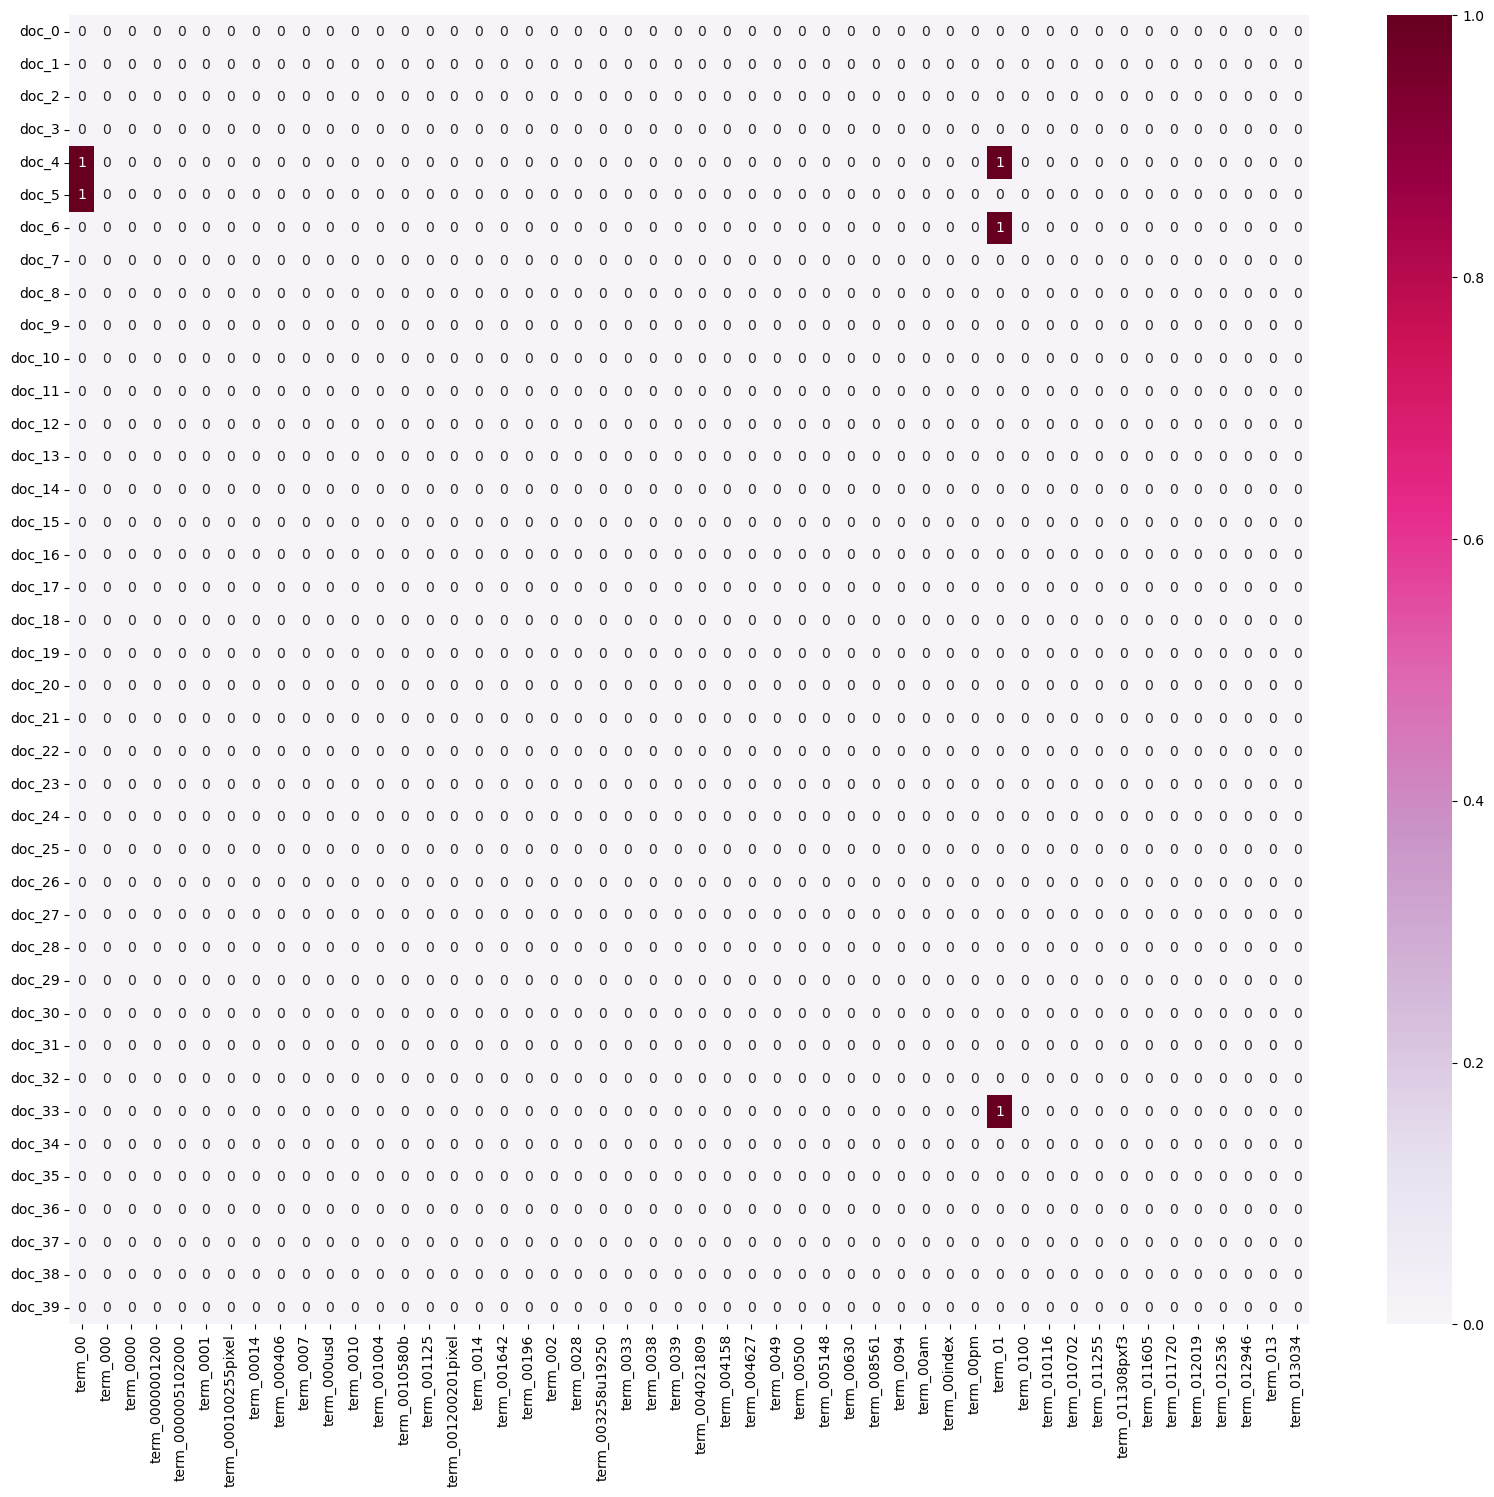

In [26]:
# Answer here
# Methods used : heatmap, subplots (to increase the size of the plot) and display (to visualize the term-document matrix)

nb_docs = 40
nb_terms = 50

# We can also decide to change the default number of columns and rows displayed if we want.
# pd.options.display.max_columns = nb_terms
# pd.options.display.max_rows = nb_docs

# Reset number of rows / columns to be displayed.
# pd.reset_option('^display.', silent=True)

plot_x_exo = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:nb_terms]]
plot_y_exo = ["doc_"+ str(i) for i in list(X.index)[0:nb_docs]]
plot_z_exo = X_counts[0:nb_docs, 0:nb_terms].toarray()
df_todraw_exo = pd.DataFrame(plot_z_exo, columns = plot_x_exo, index = plot_y_exo)
display(df_todraw_exo)
plt.subplots(figsize=(20, 17))
ax = sns.heatmap(df_todraw_exo,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## Exercise 12 (take home)
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2257, 35788)
(2257, 3)
elev_value 30.0 azim_value -90.0


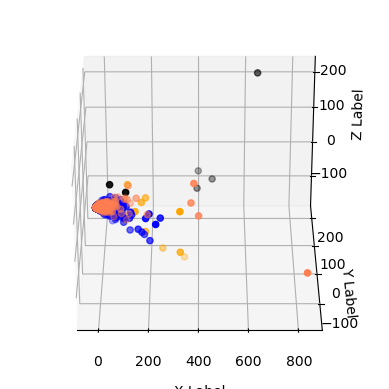

elev_value 30.0 azim_value -70.0


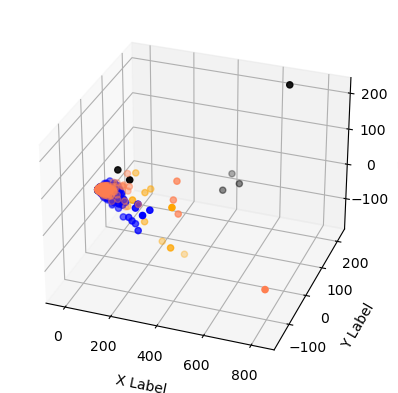

elev_value 30.0 azim_value -50.0


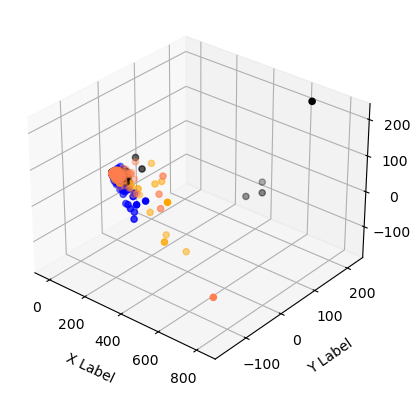

elev_value 30.0 azim_value -30.0


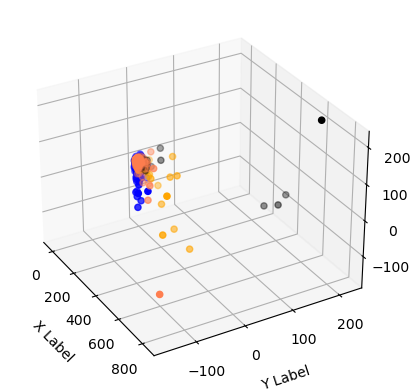

elev_value 30.0 azim_value -10.0


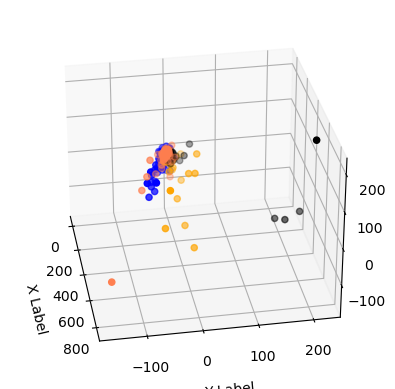

elev_value 30.0 azim_value 10.0


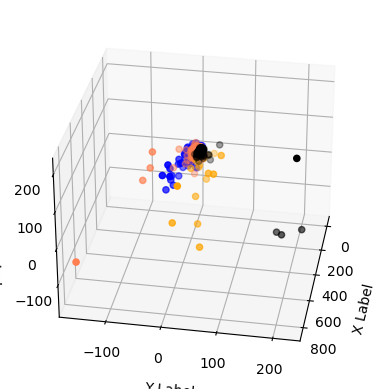

elev_value 30.0 azim_value 30.0


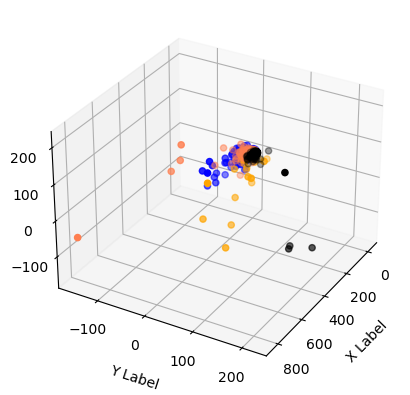

elev_value 30.0 azim_value 50.0


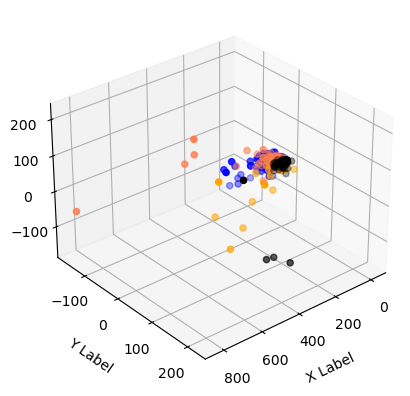

elev_value 30.0 azim_value 70.0


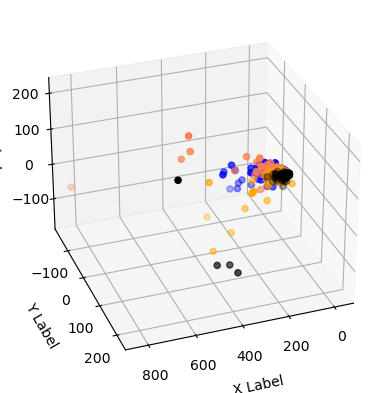

elev_value 30.0 azim_value 90.0


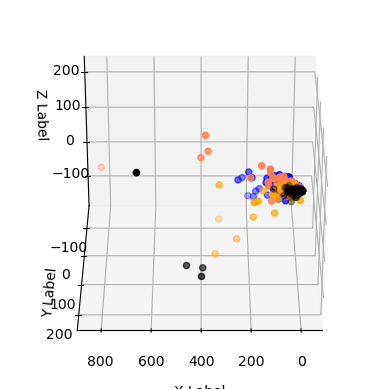

In [27]:
from sklearn.decomposition import PCA
# Answer here
print(X_counts.shape)
X_reduced_3_components = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced_3_components.shape)

col = ['coral', 'blue', 'black', 'orange']

for elev_value, azim_value in zip(np.zeros(10)+30, np.linspace(-90, 90, 10)):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for c, category in zip(col, categories):
        xline = X_reduced_3_components[X['category_name'] == category].T[0]
        yline = X_reduced_3_components[X['category_name'] == category].T[1]
        zline = X_reduced_3_components[X['category_name'] == category].T[2]
        ax.scatter(xline, yline, zline, c=c)
    print('elev_value', elev_value, 'azim_value', azim_value)
    ax.view_init(elev=elev_value, azim=azim_value)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    plt.show()

Clusters of points can be seen. As well as some outliers

## Exercise 13 (take home)
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [28]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [29]:
# Answer here
# A VOIR JSP QUOI FAIRE
import plotly.express as px

import plotly.io as pio # Line needed because I wasn't able to see the graph (related to a bug on jupyter lab)
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300], labels = dict(x = "Word",y = "Frequency"))
fig.show()

## Exercise 14 (take home) 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [30]:
# Answer here

import plotly.io as pio # Line needed because I wasn't able to see the graph (related to a bug on jupyter lab)
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

number_of_terms_to_display = 100
plotly_features_counts_df = pd.DataFrame({'term_names' : count_vect.get_feature_names_out(), 'term_frequencies' : term_frequencies})
fig = px.bar(plotly_features_counts_df.loc[:number_of_terms_to_display, :], x='term_names', y='term_frequencies', title='Frequency of term appearance')
fig.show()

## Exercise 15 (take home)
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [31]:
# Answer here

number_of_terms_to_display = 100
plotly_features_counts_df_descending_order = plotly_features_counts_df.sort_values(by='term_frequencies', ascending=False, ignore_index=True)
fig = px.bar(plotly_features_counts_df_descending_order.loc[:number_of_terms_to_display, :], x='term_names', y='term_frequencies', title='Frequency of term appearance')
fig.show()

In [32]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

In [33]:
number_of_terms_to_display = 100
plotly_features_counts_df_log = pd.DataFrame({'term_names' : count_vect.get_feature_names_out(), 'term_frequencies_log' : term_frequencies_log})
plotly_features_counts_df_log_descending_order = plotly_features_counts_df_log.sort_values(by='term_frequencies_log', ascending=False, ignore_index=True)
fig = px.bar(plotly_features_counts_df_log_descending_order.loc[:number_of_terms_to_display, :], x='term_names', y='term_frequencies_log', title='Frequency of term appearance with log transformation')
fig.show()

## Exercise 16 (take home)
Try to generate the binarization using the `category_name` column instead. Does it work?

In [34]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

# Answer here

mlb_category_name = preprocessing.LabelBinarizer()
mlb_category_name.fit(X['category_name'])
X['bin_category_name'] = mlb_category_name.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]  
6  soc.religion.christian      [0, 0, 0, 1]  
7                 sci.med      [0, 0, 1, 0]  
8                 sci.med      [0, 0, 1, 0]

Yes, it works. Indeed, 'soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism' fill the column category_name hence, the LabelBinarizer transformer who got fitted by the column 'category_name' and because this column contains only 4 differents string, it managed to correctly binarized this column.

# Part 2

In this section, I simply executed almost the same process from DM2023-Lab1-Master on the new dataset as mentioned in the instruction.

## The Data

After extracting the various files contained in a zip folder, I obtained the following documents.

In [35]:
os.listdir('./data/')

['readme.txt',
 'amazon_cells_labelled.txt',
 'yelp_labelled.txt',
 'imdb_labelled.txt']

## Data Preparation & Data Transformation

I then processed these files with python to get a nice pretty format (dataframe) to be able to use it. For the purpose, I designed a function that can read a text file with a specific format and output a DataFrame with three columns (sentence, sentiment categorie).

In [36]:
sentiment_translation = {'negative' : 0, 'positive' : 1}

In [37]:
def read_file_clean(file_path, categorie):
    with open(file_path, 'r') as f:
        file_content_list = f.readlines()
    clean_file_content_list = []
    for line in file_content_list:
        line = line.replace('\n', '')
        line = line.split('\t')
        line[1] = int(line[1])
        clean_file_content_list.append(line)
    content_array = np.array(clean_file_content_list).reshape(len(clean_file_content_list), 2)
    dataframe = pd.DataFrame({'sentence' : content_array[:,0], 'sentiment': content_array[:,1]})
    dataframe['categorie'] = categorie
    dataframe = dataframe.astype({"sentiment": int})
    return dataframe

In [38]:
amazon_reviews = read_file_clean('./data/amazon_cells_labelled.txt', 'product')
yelp_reviews = read_file_clean('./data/yelp_labelled.txt', 'restaurant')
imdb_reviews = read_file_clean('./data/imdb_labelled.txt', 'movie')
amazon_reviews_and_yelp_reviews = pd.concat([amazon_reviews, yelp_reviews], ignore_index=True)
data_reviews = pd.concat([amazon_reviews_and_yelp_reviews, imdb_reviews], ignore_index=True)

In [39]:
df = data_reviews.copy()

In [40]:
df

sentence  sentiment categorie
0     So there is no way for me to plug it in here i...          0   product
1                           Good case, Excellent value.          1   product
2                                Great for the jawbone.          1   product
3     Tied to charger for conversations lasting more...          0   product
4                                     The mic is great.          1   product
...                                                 ...        ...       ...
2995  I just got bored watching Jessice Lange take h...          0     movie
2996  Unfortunately, any virtue in this film's produ...          0     movie
2997                   In a word, it is embarrassing.            0     movie
2998                               Exceptionally bad!            0     movie
2999  All in all its an insult to one's intelligence...          0     movie

[3000 rows x 3 columns]

Note: For the following, I've decided to keep the "category" column in the dataframe for use in various data visualizations. However, this column will not be used for prediction or analysis by NLP processes.

## Data Mining using Pandas

### Missing Values

In [41]:
df.isnull().sum(axis=0)

sentence     0
sentiment    0
categorie    0
dtype: int64

There are no missing values

### Duplicate Data

In [42]:
df[df.duplicated()].shape

(17, 3)

17 rows are duplicated data

In [43]:
# df = df.drop_duplicates(keep='first') # I drop duplicated data and keep the first occurence of each duplicated data 

I decided to keep duplicated data considering that duplicate data could reflect repeated observations at different times. Hence, it can be useful for different observations such as the frequency of words in sentences.

## Data Preprocessing

### Sampling

In [44]:
print(df.shape)
df_sample = df.sample(n=1000,random_state=5) #random state 3 is ok if data duplicated dropped 5 good if data not dropped
display(df_sample)

(3000, 3)


sentence  sentiment   categorie
2899  Director Neil LaBute uses brutal violence to s...          1       movie
2670                        This is a stunning movie.            1       movie
2774  Also the music by Mark Snow is possibly the be...          1       movie
1699  Anyways, The food was definitely not filling a...          0  restaurant
1933                            We won't be going back.          0  restaurant
...                                                 ...        ...         ...
1110  REAL sushi lovers, let's be honest - Yama is n...          0  restaurant
780                    I am sorry I made this purchase.          0     product
731   None of the three sizes they sent with the hea...          0     product
1969  I don't know what the big deal is about this p...          0  restaurant
2635  Lovely little thriller from Hitchcock, with lo...          1       movie

[1000 rows x 3 columns]

In [45]:
df['categorie'].value_counts()

product       1000
restaurant    1000
movie         1000
Name: categorie, dtype: int64

In [46]:
df_sample['categorie'].value_counts()

product       338
restaurant    333
movie         329
Name: categorie, dtype: int64

In [47]:
df['sentiment'].value_counts()

0    1500
1    1500
Name: sentiment, dtype: int64

In [48]:
df_sample['sentiment'].value_counts()

1    500
0    500
Name: sentiment, dtype: int64

Our sample is a good representation of our main dataset

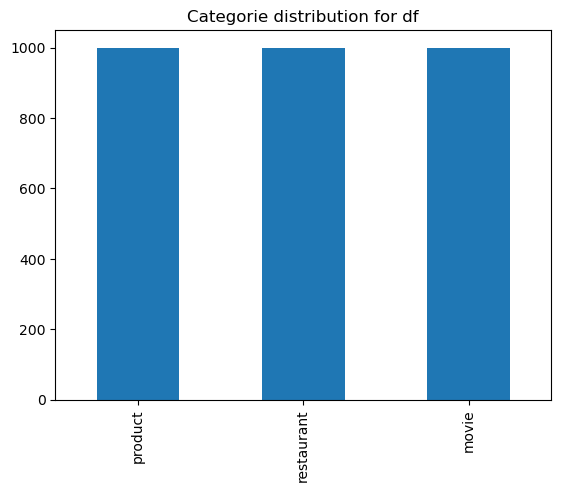

In [49]:
df['categorie'].value_counts().plot.bar(title='Categorie distribution for df')
plt.show()

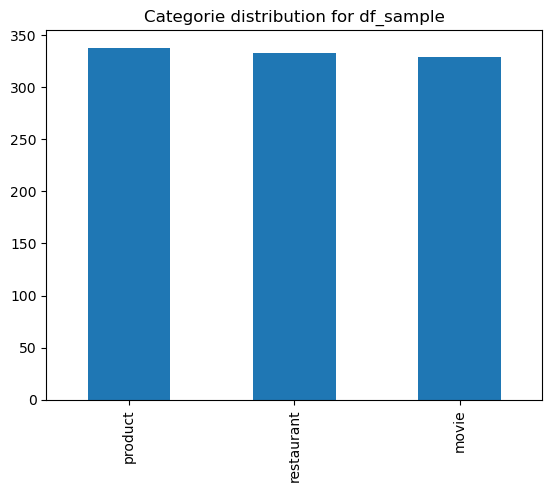

In [50]:
df_sample['categorie'].value_counts().plot.bar(title='Categorie distribution for df_sample')
plt.show()

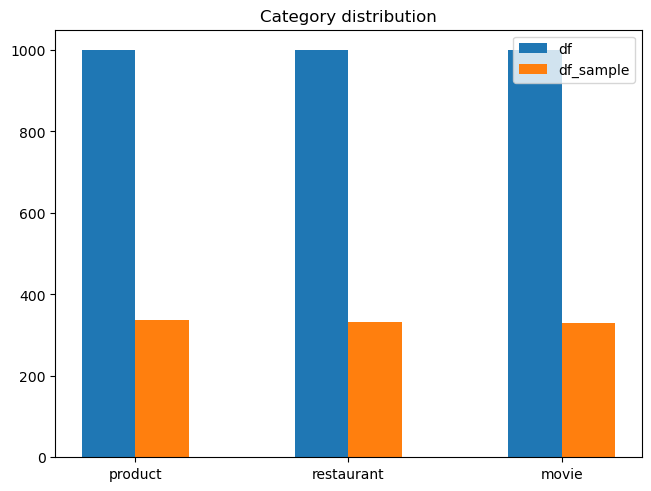

In [51]:
category_names = df['categorie'].unique()
category_names_values = {'df' : df['categorie'].value_counts(), 'df_sample' : df_sample['categorie'].value_counts()}
x = np.arange(len(category_names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in category_names_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1
ax.set_title('Category distribution')
ax.set_xticks(x + width/2, category_names)
ax.legend(loc='upper right', ncols=1)
plt.show()

### Feature Creation

In [52]:
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [53]:
df

sentence  sentiment categorie  \
0     So there is no way for me to plug it in here i...          0   product   
1                           Good case, Excellent value.          1   product   
2                                Great for the jawbone.          1   product   
3     Tied to charger for conversations lasting more...          0   product   
4                                     The mic is great.          1   product   
...                                                 ...        ...       ...   
2995  I just got bored watching Jessice Lange take h...          0     movie   
2996  Unfortunately, any virtue in this film's produ...          0     movie   
2997                   In a word, it is embarrassing.            0     movie   
2998                               Exceptionally bad!            0     movie   
2999  All in all its an insult to one's intelligence...          0     movie   

                                               unigrams  
0     [So, there, is, no, way, for, me, to, plug, it...  
1                  [Good, case, ,, Excellent, value, .]  
2                         [Great, for, the, jawbone, .]  
3     [Tied, to, charger, for, conversations, lastin...  
4                              [The, mic, is, great, .]  
...                                                 ...  
2995  [I, just, got, bored, watching, Jessice, Lange...  
2996  [Unfortunately, ,, any, virtue, in, this, film...  
2997          [In, a, word, ,, it, is, embarrassing, .]  
2998                            [Exceptionally, bad, !]  
2999  [All, in, all, its, an, insult, to, one, 's, i...  

[3000 rows x 4 columns]

### Feature subset selection

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df['sentence']) #learn the vocabulary and return document-term matrix
print(df_counts.shape)

(3000, 5155)


In [55]:
df_counts

<3000x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31578 stored elements in Compressed Sparse Row format>

term_00  term_10  term_100  term_11  term_12  term_13  term_15  \
doc_0         0        0         0        0        0        0        0   
doc_1         0        0         0        0        0        0        0   
doc_2         0        0         0        0        0        0        0   
doc_3         0        0         0        0        0        0        0   
doc_4         0        0         0        0        0        0        0   
...         ...      ...       ...      ...      ...      ...      ...   
doc_65        0        0         0        0        0        0        0   
doc_66        0        0         0        0        0        0        0   
doc_67        0        0         0        0        0        0        0   
doc_68        0        0         0        0        0        0        0   
doc_69        0        0         0        0        0        0        0   

        term_15g  term_15pm  term_17  ...  term_1986  term_1995  term_1998  \
doc_0          0          0        0  ...          0          0          0   
doc_1          0          0        0  ...          0          0          0   
doc_2          0          0        0  ...          0          0          0   
doc_3          0          0        0  ...          0          0          0   
doc_4          0          0        0  ...          0          0          0   
...          ...        ...      ...  ...        ...        ...        ...   
doc_65         0          0        0  ...          0          0          0   
doc_66         0          0        0  ...          0          0          0   
doc_67         0          0        0  ...          0          0          0   
doc_68         0          0        0  ...          0          0          0   
doc_69         0          0        0  ...          0          0          0   

        term_20  term_2000  term_2005  term_2006  term_2007  term_20th  \
doc_0         0          0          0          0          0          0   
doc_1         0          0          0          0          0          0   
doc_2         0          0          0          0          0          0   
doc_3         0          0          0          0          0          0   
doc_4         0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
doc_65        0          0          0          0          0          0   
doc_66        0          0          0          0          0          0   
doc_67        0          0          0          0          0          0   
doc_68        0          0          0          0          0          0   
doc_69        0          0          0          0          0          0   

        term_2160  
doc_0           0  
doc_1           0  
doc_2           0  
doc_3           0  
doc_4           0  
...           ...  
doc_65          0  
doc_66          0  
doc_67          0  
doc_68          0  
doc_69          0  

[70 rows x 30 columns]

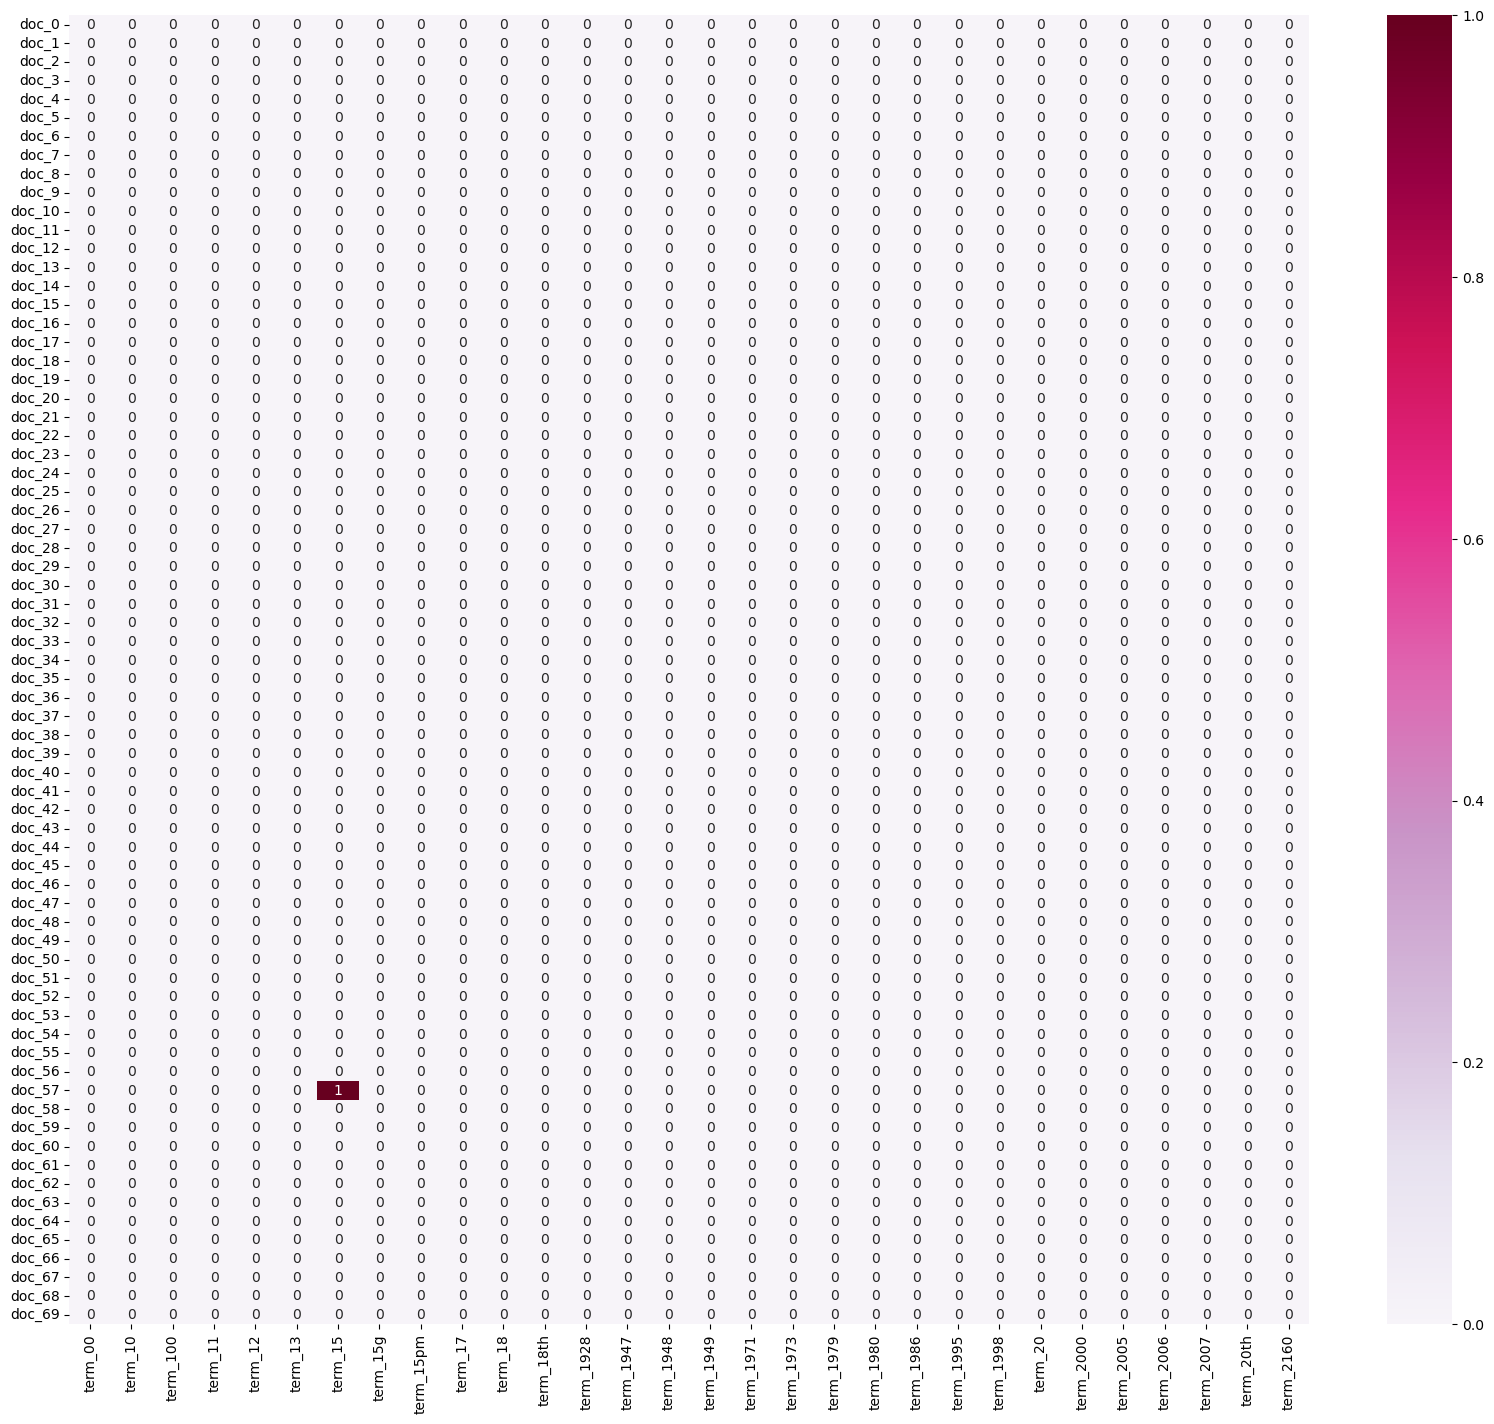

In [56]:
nb_docs = 70
nb_terms = 30

# We can also decide to change the default number of columns and rows displayed if we want.
# pd.options.display.max_columns = nb_terms
# pd.options.display.max_rows = nb_docs

# Reset number of rows / columns to be displayed.
# pd.reset_option('^display.', silent=True)

plot_x_exo = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:nb_terms]]
plot_y_exo = ["doc_"+ str(i) for i in list(df.index)[0:nb_docs]]
plot_z_exo = df_counts[0:nb_docs, 0:nb_terms].toarray()
df_todraw_exo = pd.DataFrame(plot_z_exo, columns = plot_x_exo, index = plot_y_exo)
display(df_todraw_exo)
plt.subplots(figsize=(20, 17))
ax = sns.heatmap(df_todraw_exo,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimensionality Reduction

In [57]:
from sklearn.decomposition import PCA

(3000, 5155)
(3000, 2)


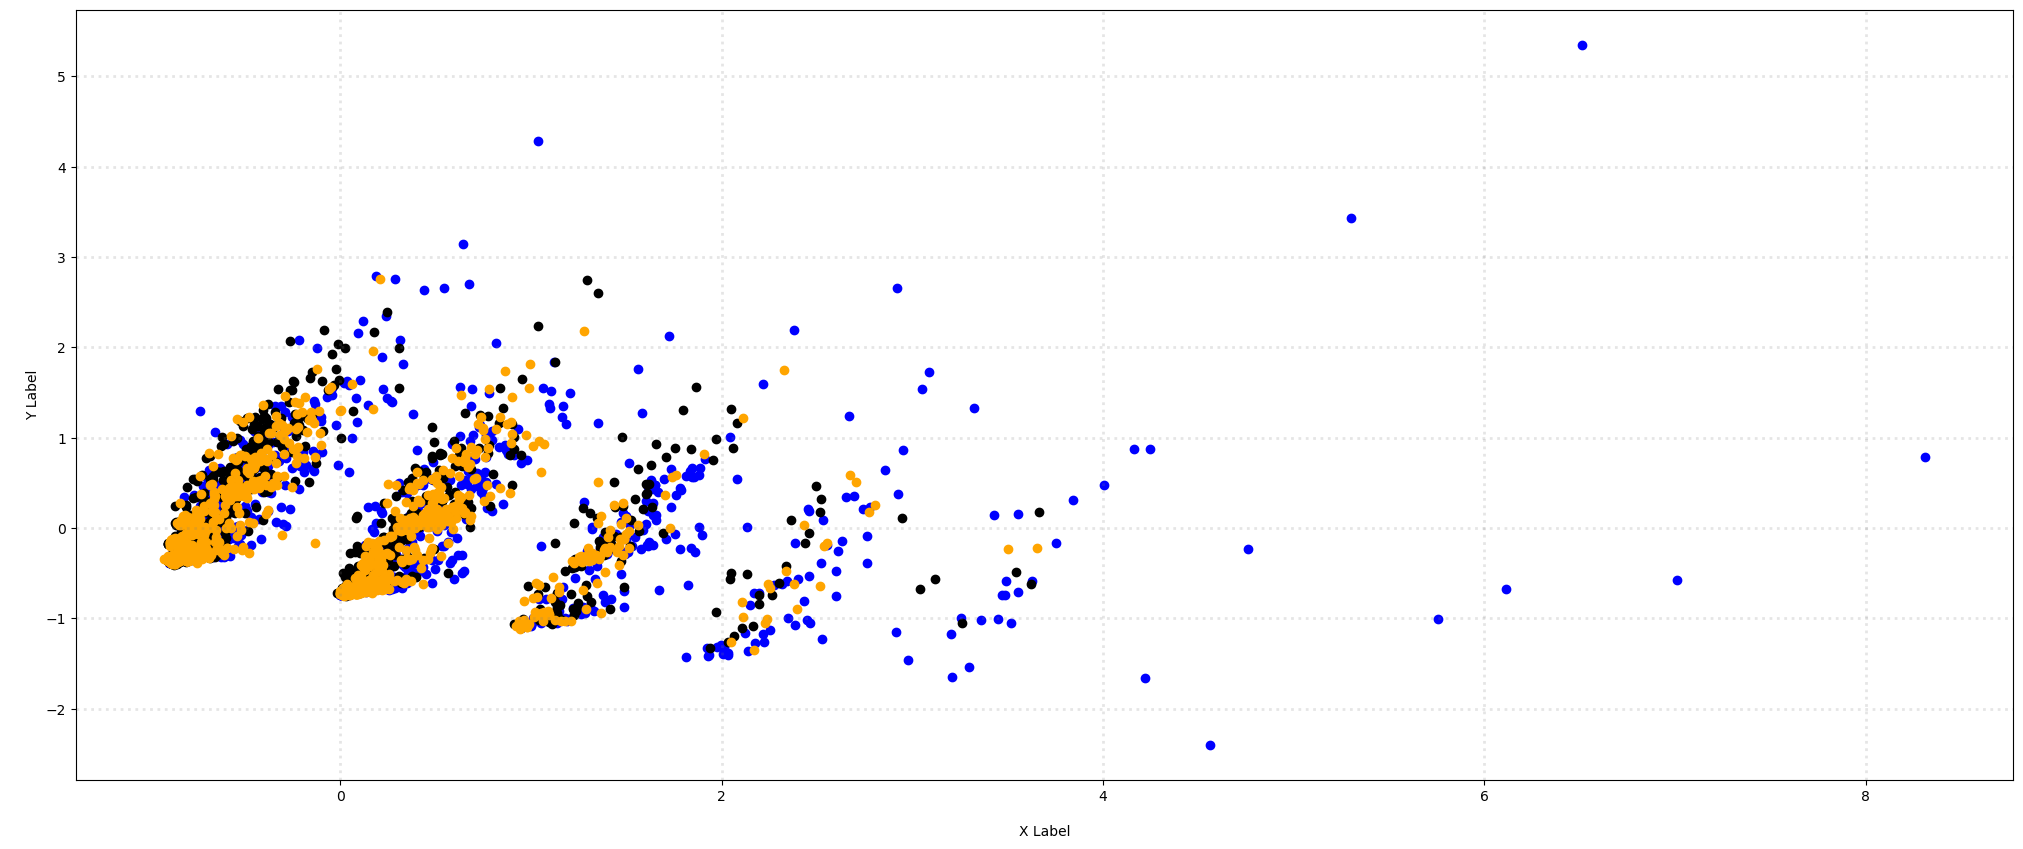

In [58]:
print(df_counts.shape)
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
print(df_reduced.shape)

categories = ['movie', 'product', 'restaurant']
col = ['blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['categorie'] == category].T[0]
    ys = df_reduced[df['categorie'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [59]:
print(df_counts.shape)
df_reduced_3_components = PCA(n_components = 3).fit_transform(df_counts.toarray())
print(df_reduced_3_components.shape)

(3000, 5155)
(3000, 3)


elev_value -90.0 azim_value 30.0


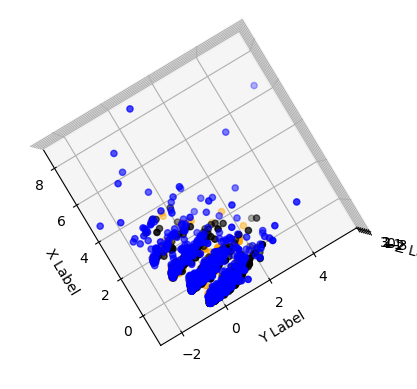

elev_value -70.0 azim_value 30.0


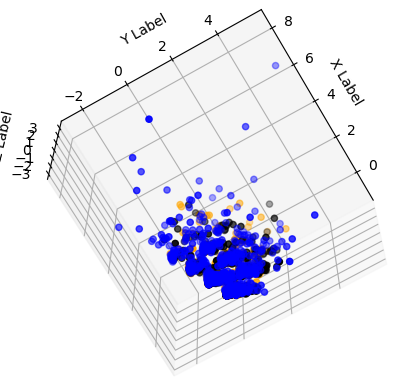

elev_value -50.0 azim_value 30.0


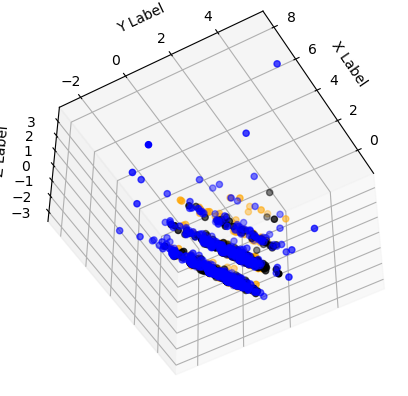

elev_value -30.0 azim_value 30.0


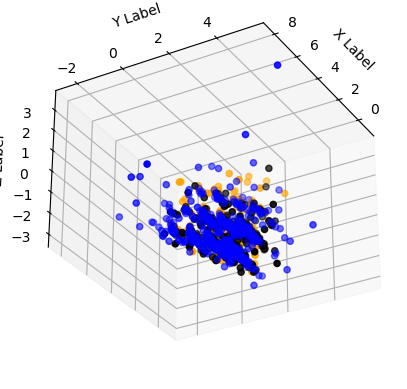

elev_value -10.0 azim_value 30.0


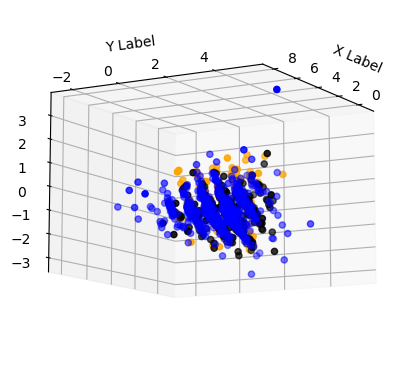

elev_value 10.0 azim_value 30.0


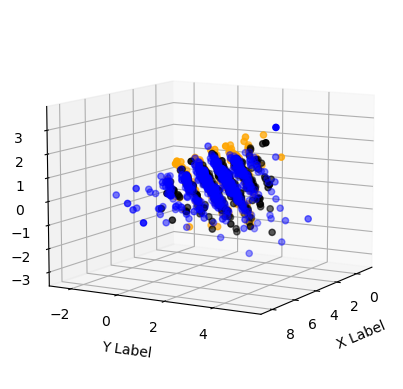

elev_value 30.0 azim_value 30.0


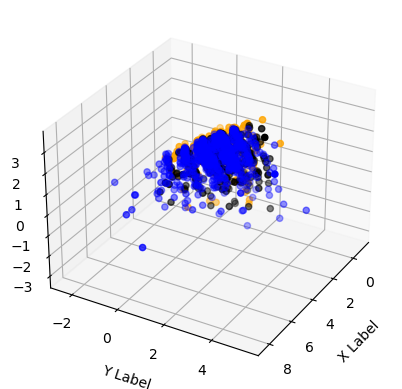

elev_value 50.0 azim_value 30.0


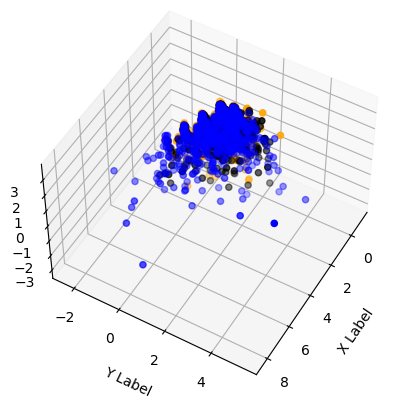

elev_value 70.0 azim_value 30.0


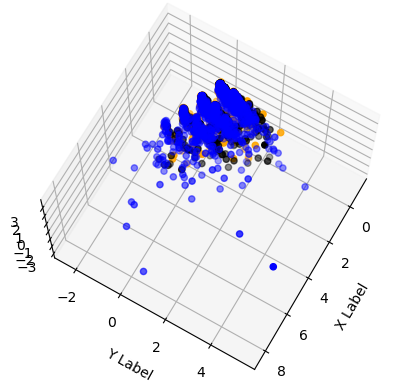

elev_value 90.0 azim_value 30.0


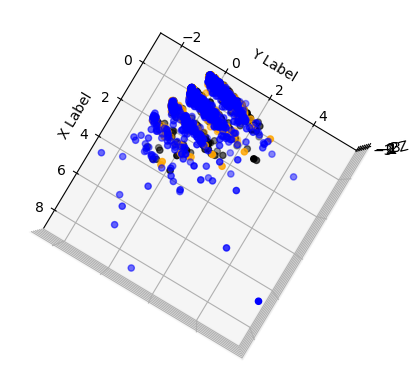

In [60]:
col = ['blue', 'black', 'orange']

for elev_value, azim_value in zip(np.linspace(-90, 90, 10), np.zeros(10)+30):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for c, category in zip(col, categories):
        xline = df_reduced_3_components[df['categorie'] == category].T[0]
        yline = df_reduced_3_components[df['categorie'] == category].T[1]
        zline = df_reduced_3_components[df['categorie'] == category].T[2]
        ax.scatter(xline, yline, zline, c=c)
    print('elev_value', elev_value, 'azim_value', azim_value)
    ax.view_init(elev=elev_value, azim=azim_value)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    plt.show()

### Attribute Transformation / Aggregation

In [61]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [62]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [63]:
import plotly.express as px

import plotly.io as pio # Line needed because I wasn't able to see the graph (related to a bug on jupyter lab)
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

number_of_terms_to_display = 100 # max = 5155
plotly_features_counts_df_log = pd.DataFrame({'term_names' : count_vect.get_feature_names_out(), 'term_frequencies_log' : term_frequencies_log})
plotly_features_counts_df_log_descending_order = plotly_features_counts_df_log.sort_values(by='term_frequencies_log', ascending=False, ignore_index=True)
fig = px.bar(plotly_features_counts_df_log_descending_order.loc[:number_of_terms_to_display, :], x='term_names', y='term_frequencies_log', title='Frequency of term appearance with log transformation')
fig.show()

### Discretization and Binarization

In [64]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [65]:
mlb = preprocessing.LabelBinarizer()

In [66]:
mlb.fit(df['categorie'])

LabelBinarizer()

In [67]:
df['bin_category'] = mlb.transform(df['categorie']).tolist()

In [68]:
df

sentence  sentiment categorie  \
0     So there is no way for me to plug it in here i...          0   product   
1                           Good case, Excellent value.          1   product   
2                                Great for the jawbone.          1   product   
3     Tied to charger for conversations lasting more...          0   product   
4                                     The mic is great.          1   product   
...                                                 ...        ...       ...   
2995  I just got bored watching Jessice Lange take h...          0     movie   
2996  Unfortunately, any virtue in this film's produ...          0     movie   
2997                   In a word, it is embarrassing.            0     movie   
2998                               Exceptionally bad!            0     movie   
2999  All in all its an insult to one's intelligence...          0     movie   

                                               unigrams bin_category  
0     [So, there, is, no, way, for, me, to, plug, it...    [0, 1, 0]  
1                  [Good, case, ,, Excellent, value, .]    [0, 1, 0]  
2                         [Great, for, the, jawbone, .]    [0, 1, 0]  
3     [Tied, to, charger, for, conversations, lastin...    [0, 1, 0]  
4                              [The, mic, is, great, .]    [0, 1, 0]  
...                                                 ...          ...  
2995  [I, just, got, bored, watching, Jessice, Lange...    [1, 0, 0]  
2996  [Unfortunately, ,, any, virtue, in, this, film...    [1, 0, 0]  
2997          [In, a, word, ,, it, is, embarrassing, .]    [1, 0, 0]  
2998                            [Exceptionally, bad, !]    [1, 0, 0]  
2999  [All, in, all, its, an, insult, to, one, 's, i...    [1, 0, 0]  

[3000 rows x 5 columns]

### Data Exploration

This part isn't very useful as I've simply used what was done in the preprocessing part of the previous notebook. However, as it's not the same dataset, the result is not satisfying.

In [69]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [70]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [71]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [72]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Part 3

In [73]:
df

sentence  sentiment categorie  \
0     So there is no way for me to plug it in here i...          0   product   
1                           Good case, Excellent value.          1   product   
2                                Great for the jawbone.          1   product   
3     Tied to charger for conversations lasting more...          0   product   
4                                     The mic is great.          1   product   
...                                                 ...        ...       ...   
2995  I just got bored watching Jessice Lange take h...          0     movie   
2996  Unfortunately, any virtue in this film's produ...          0     movie   
2997                   In a word, it is embarrassing.            0     movie   
2998                               Exceptionally bad!            0     movie   
2999  All in all its an insult to one's intelligence...          0     movie   

                                               unigrams bin_category  
0     [So, there, is, no, way, for, me, to, plug, it...    [0, 1, 0]  
1                  [Good, case, ,, Excellent, value, .]    [0, 1, 0]  
2                         [Great, for, the, jawbone, .]    [0, 1, 0]  
3     [Tied, to, charger, for, conversations, lastin...    [0, 1, 0]  
4                              [The, mic, is, great, .]    [0, 1, 0]  
...                                                 ...          ...  
2995  [I, just, got, bored, watching, Jessice, Lange...    [1, 0, 0]  
2996  [Unfortunately, ,, any, virtue, in, this, film...    [1, 0, 0]  
2997          [In, a, word, ,, it, is, embarrassing, .]    [1, 0, 0]  
2998                            [Exceptionally, bad, !]    [1, 0, 0]  
2999  [All, in, all, its, an, insult, to, one, 's, i...    [1, 0, 0]  

[3000 rows x 5 columns]

## New data visualizations

### Words frequency

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df['sentence']) #learn the vocabulary and return document-term matrix
print(df_counts.shape)

(3000, 5155)


#### Per sentiment

For each sentiment label (1 and 0) and category, I create histograms of word frequencies. This can help to understand which words are most common in positive and negative sentiments within each category.

In [75]:
import math
import plotly.express as px
import plotly.io as pio # Line needed because I wasn't able to see the graph (related to a bug on jupyter lab)
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

for k, v in {'negative' : 0, 'positive' : 1}.items():
    term_frequencies = np.asarray(df_counts[df['sentiment'] == v].sum(axis=0))[0]
    # term_frequencies_log = [math.log(i) for i in term_frequencies]
    term_frequencies_log = []
    for i in term_frequencies :
        if i > 0:
            term_frequencies_log.append(math.log(i))
        else:
            term_frequencies_log.append(i)
    
    number_of_terms_to_display = 20 # max = 5155
    plotly_features_counts_df_log = pd.DataFrame({'term_names' : count_vect.get_feature_names_out(), 'term_frequencies_log' : term_frequencies_log})
    plotly_features_counts_df_log_descending_order = plotly_features_counts_df_log.sort_values(by='term_frequencies_log', ascending=False, ignore_index=True)
    fig = px.bar(plotly_features_counts_df_log_descending_order.loc[:number_of_terms_to_display, :], x='term_names', y='term_frequencies_log', title=f'Frequency of term appearance for {k} reviews')
    fig.show()

#### Per categorie and per sentiment

In [76]:
import math
import plotly.express as px
import plotly.io as pio # Line needed because I wasn't able to see the graph (related to a bug on jupyter lab)
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

for categorie in df['categorie'].unique():
    for k, v in {'negative' : 0, 'positive' : 1}.items():
        term_frequencies = np.asarray(df_counts[(df['categorie'] == categorie) & (df['sentiment'] == v)].sum(axis=0))[0]
        # term_frequencies_log = [math.log(i) for i in term_frequencies if i>0]
        term_frequencies_log = []
        for i in term_frequencies :
            if i > 0:
                term_frequencies_log.append(math.log(i))
            else:
                term_frequencies_log.append(i)
        
        number_of_terms_to_display = 20 # max = 5155
        plotly_features_counts_df_log = pd.DataFrame({'term_names' : count_vect.get_feature_names_out(), 'term_frequencies_log' : term_frequencies_log})
        plotly_features_counts_df_log_descending_order = plotly_features_counts_df_log.sort_values(by='term_frequencies_log', ascending=False, ignore_index=True)
        fig = px.bar(plotly_features_counts_df_log_descending_order.loc[:number_of_terms_to_display, :], x='term_names', y='term_frequencies_log', title=f'Frequency of term appearance for {k} {categorie} reviews')
        fig.show()

Note: The code is good, but it seems that the display is sometimes disturbed, so if you can't see all the graphs, run the cell another time and you may be able to see each graph as expected.

### Wordclouds

#### Per sentiment

For each sentiment label (1 and 0) and category, I create wordclouds of word frequencies. This can help to understand which words are most common in positive and negative sentiments within each category.

For the execution of the following plot, it is needed to import and install the wordcloud python library

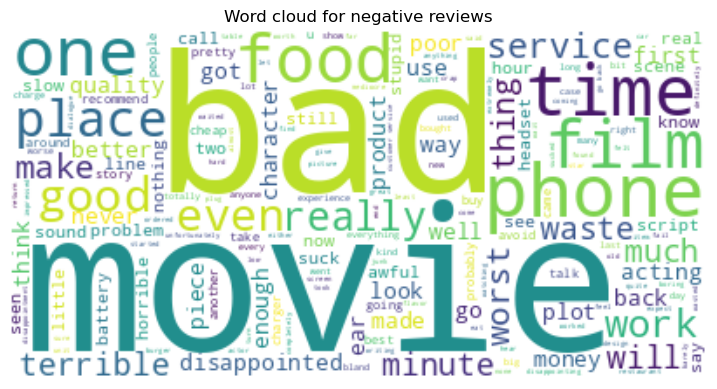

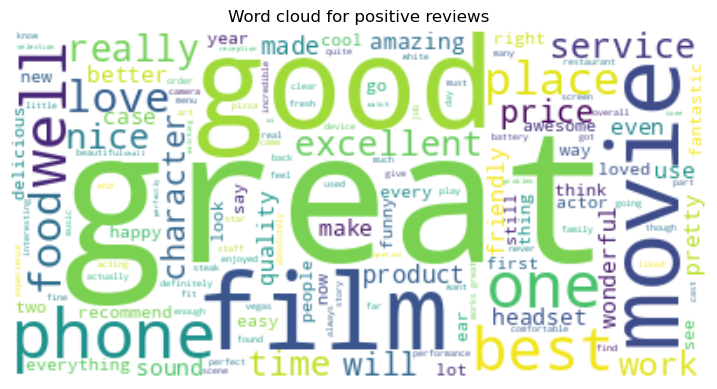

In [77]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for sentiment_word, sentiment_value in sentiment_translation.items():
    filter = (df['sentiment'] == sentiment_value)
    text = ' '.join(df[filter]['sentence'].str.lower().to_list())
    
    plt.figure(figsize=(9, 7))
    
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white", ).generate(text)
    
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word cloud for {sentiment_word} reviews')
    plt.axis("off")
    plt.show()

#### Per categorie and per sentiment

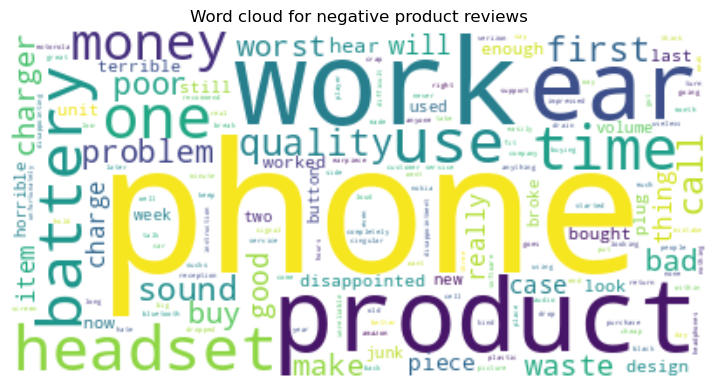

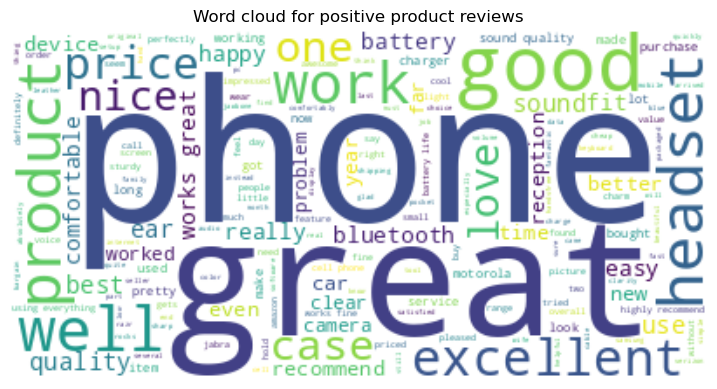

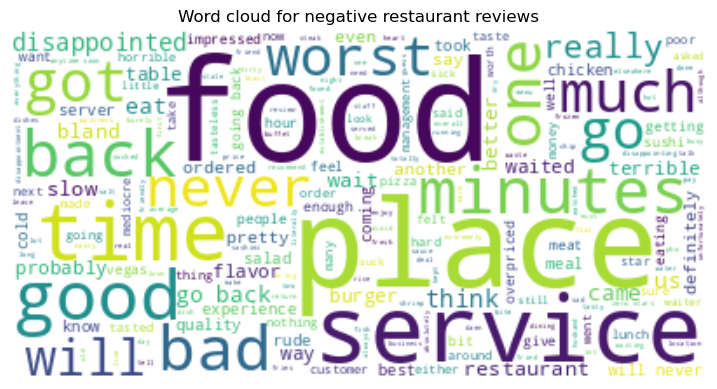

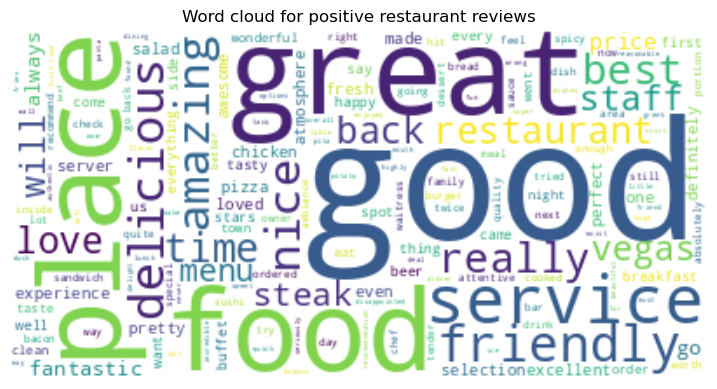

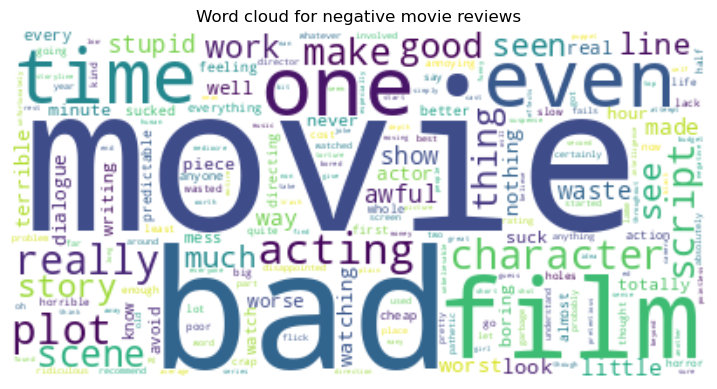

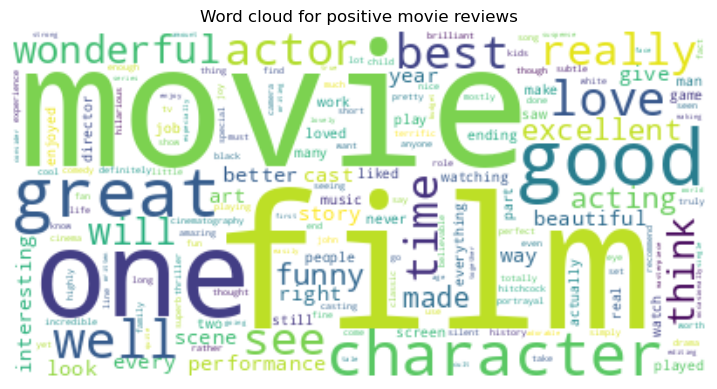

In [78]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for categorie in df['categorie'].unique():
    for sentiment_word, sentiment_value in sentiment_translation.items():
        filter = (df['sentiment'] == sentiment_value) & (df['categorie'] == categorie)
        text = ' '.join(df[filter]['sentence'].str.lower().to_list())
        
        plt.figure(figsize=(9, 7))
        
        # Create and generate a word cloud image:
        wordcloud = WordCloud(background_color="white", ).generate(text)
        
        # Display the generated image:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word cloud for {sentiment_word} {categorie} reviews')
        plt.axis("off")
        plt.show()

### Sentences metrics

In this section, I use additional sentence-related numerical measures (sentence length, word count) to visualize possible trends.

In [79]:
df['unigrams'] = df['sentence'].apply(lambda x : dmh.tokenize_text(x))

In [80]:
df['unigrams_length'] = df['unigrams'].apply(lambda x : len(x))
df['sentence_length'] = df['sentence'].apply(lambda x : len(x))

#### Word count

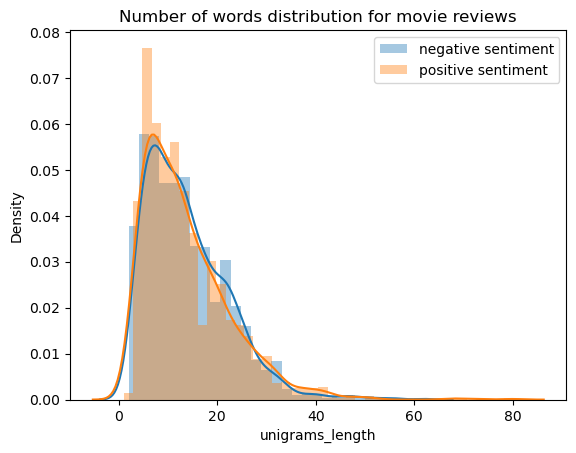

In [81]:
plt.figure()
for sentiment_word, sentiment_value in sentiment_translation.items() :
    temporarily_filter = (df['sentiment'] == sentiment_value)
    df_focus = df[temporarily_filter]
    sns.distplot(df_focus['unigrams_length'], label = f'{sentiment_word} sentiment')
plt.legend()
plt.title(f'Number of words distribution for {categorie} reviews')
plt.show()

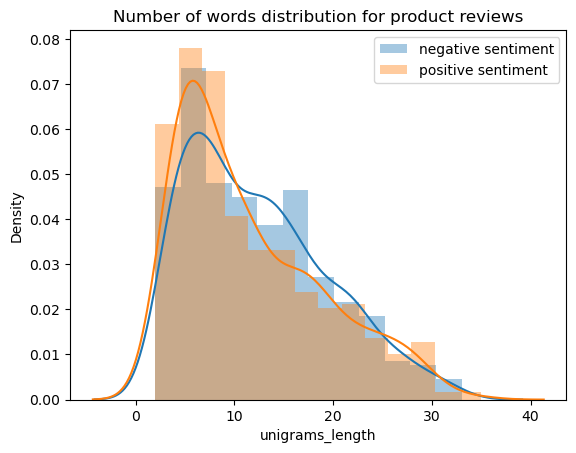

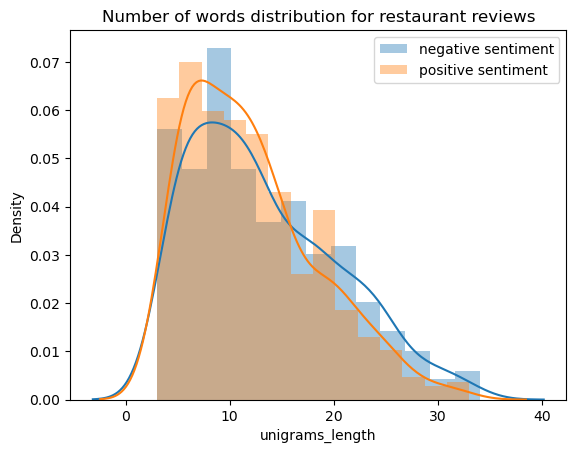

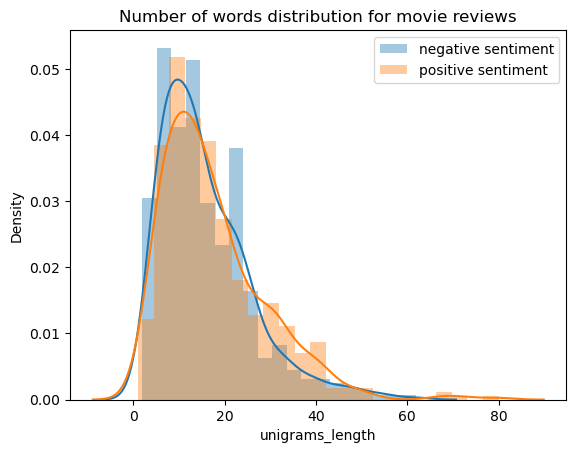

In [82]:
for categorie in df['categorie'].unique():
    plt.figure()
    for sentiment_word, sentiment_value in sentiment_translation.items() :
        temporarily_filter = (df['categorie'] == categorie) & (df['sentiment'] == sentiment_value)
        df_focus = df[temporarily_filter]
        sns.distplot(df_focus['unigrams_length'], label = f'{sentiment_word} sentiment')
    plt.legend()
    plt.title(f'Number of words distribution for {categorie} reviews')
    plt.show()

#### Sentence length

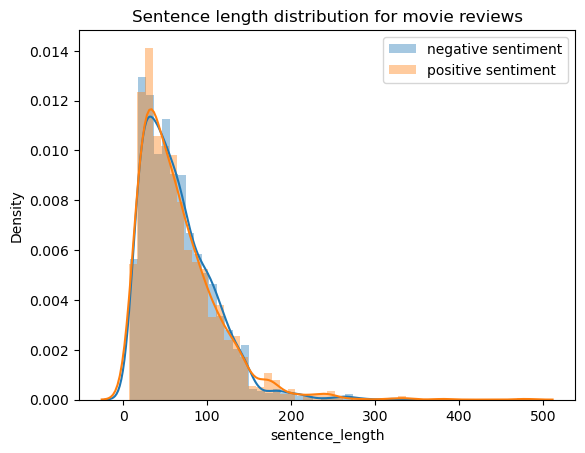

In [83]:
for sentiment_word, sentiment_value in sentiment_translation.items() :
    temporarily_filter = (df['sentiment'] == sentiment_value)
    df_focus = df[temporarily_filter]
    sns.distplot(df_focus['sentence_length'], label = f'{sentiment_word} sentiment')
plt.legend()
plt.title(f'Sentence length distribution for {categorie} reviews')
plt.show()

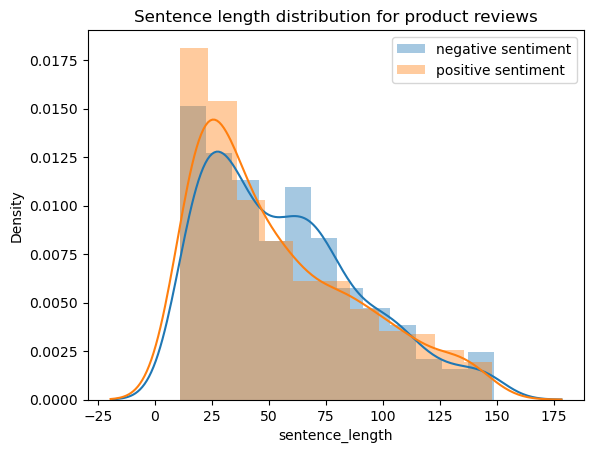

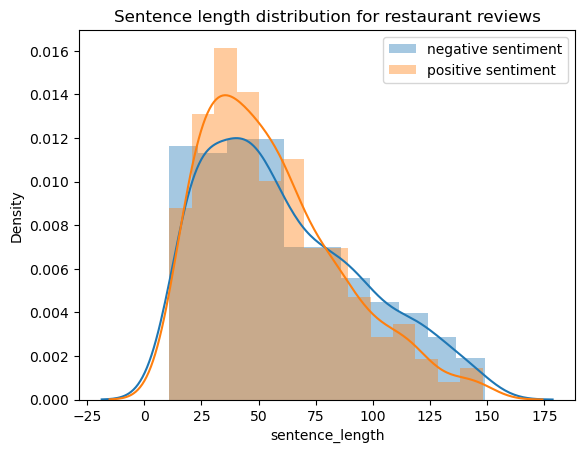

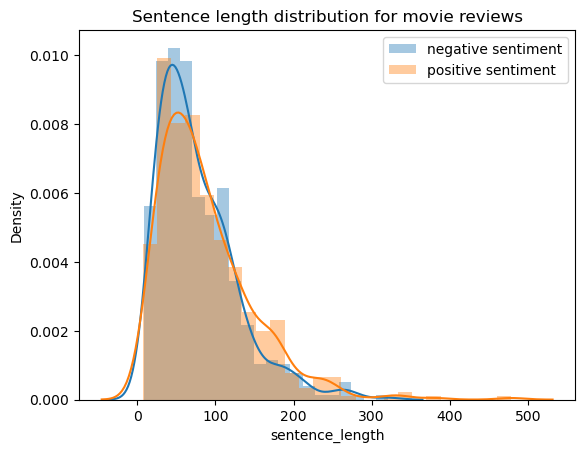

In [84]:
for categorie in df['categorie'].unique():
    plt.figure()
    for sentiment_word, sentiment_value in sentiment_translation.items() :
        temporarily_filter = (df['categorie'] == categorie) & (df['sentiment'] == sentiment_value)
        df_focus = df[temporarily_filter]
        sns.distplot(df_focus['sentence_length'], label = f'{sentiment_word} sentiment')
    plt.legend()
    plt.title(f'Sentence length distribution for {categorie} reviews')
    plt.show()

For restaurant and product reviews, we can observe that the length of sentences for negative reviews is greater than sentences for positive reviews.

## TF-IDF Features

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
vectorizer_tfidf = TfidfVectorizer()
df_tfidf = vectorizer_tfidf.fit_transform(df['sentence'])

In [87]:
df_tfidf

<3000x5155 sparse matrix of type '<class 'numpy.float64'>'
	with 31578 stored elements in Compressed Sparse Row format>

In [88]:
term_frequencies_tfidf = np.asarray(df_tfidf.sum(axis=0))[0]

#### Per sentiment

In [89]:
import math
import plotly.express as px
import plotly.io as pio # Line needed because I wasn't able to see the graph (related to a bug on jupyter lab)
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

for sentiment_word, sentiment_value in sentiment_translation.items():
    term_frequencies = np.asarray(df_tfidf[df['sentiment'] == sentiment_value].sum(axis=0))[0]
    
    number_of_terms_to_display = 20 # max = 5155
    plotly_features_counts_df_log = pd.DataFrame({'term_names' : vectorizer_tfidf.get_feature_names_out(), 'term_frequencies_tfidf' : term_frequencies})
    plotly_features_counts_df_log_descending_order = plotly_features_counts_df_log.sort_values(by='term_frequencies_tfidf', ascending=False, ignore_index=True)
    fig = px.bar(plotly_features_counts_df_log_descending_order.loc[:number_of_terms_to_display, :], x='term_names', y='term_frequencies_tfidf', title=f'Frequency of term appearance for {sentiment_word} reviews using tfidf')
    fig.show()

#### Per categorie and per sentiment

In [90]:
import math
import plotly.express as px
import plotly.io as pio # Line needed because I wasn't able to see the graph (related to a bug on jupyter lab)
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

for categorie in df['categorie'].unique():
    for sentiment_word, sentiment_value in sentiment_translation.items():
        filter = (df['sentiment'] == sentiment_value) & (df['categorie'] == categorie)
        term_frequencies = np.asarray(df_tfidf[filter].sum(axis=0))[0]
        
        number_of_terms_to_display = 20 # max = 5155
        plotly_features_counts_df_log = pd.DataFrame({'term_names' : vectorizer_tfidf.get_feature_names_out(), 'term_frequencies' : term_frequencies})
        plotly_features_counts_df_log_descending_order = plotly_features_counts_df_log.sort_values(by='term_frequencies', ascending=False, ignore_index=True)
        fig = px.bar(plotly_features_counts_df_log_descending_order.loc[:number_of_terms_to_display, :], x='term_names', y='term_frequencies', title=f'Frequency of term appearance for {sentiment_word} {categorie} reviews with tfidf')
        fig.show()

Note: The code is good, but it seems that the display is sometimes disturbed, so if you can't see all the graphs, run the cell another time and you may be able to see each graph as expected.

## Naive Bayes classifier

In [91]:
df

sentence  sentiment categorie  \
0     So there is no way for me to plug it in here i...          0   product   
1                           Good case, Excellent value.          1   product   
2                                Great for the jawbone.          1   product   
3     Tied to charger for conversations lasting more...          0   product   
4                                     The mic is great.          1   product   
...                                                 ...        ...       ...   
2995  I just got bored watching Jessice Lange take h...          0     movie   
2996  Unfortunately, any virtue in this film's produ...          0     movie   
2997                   In a word, it is embarrassing.            0     movie   
2998                               Exceptionally bad!            0     movie   
2999  All in all its an insult to one's intelligence...          0     movie   

                                               unigrams bin_category  \
0     [So, there, is, no, way, for, me, to, plug, it...    [0, 1, 0]   
1                  [Good, case, ,, Excellent, value, .]    [0, 1, 0]   
2                         [Great, for, the, jawbone, .]    [0, 1, 0]   
3     [Tied, to, charger, for, conversations, lastin...    [0, 1, 0]   
4                              [The, mic, is, great, .]    [0, 1, 0]   
...                                                 ...          ...   
2995  [I, just, got, bored, watching, Jessice, Lange...    [1, 0, 0]   
2996  [Unfortunately, ,, any, virtue, in, this, film...    [1, 0, 0]   
2997          [In, a, word, ,, it, is, embarrassing, .]    [1, 0, 0]   
2998                            [Exceptionally, bad, !]    [1, 0, 0]   
2999  [All, in, all, its, an, insult, to, one, 's, i...    [1, 0, 0]   

      unigrams_length  sentence_length  
0                  22               82  
1                   6               27  
2                   5               22  
3                  13               79  
4                   5               17  
...               ...              ...  
2995               12               63  
2996               17               92  
2997                8               32  
2998                3               20  
2999               17               75  

[3000 rows x 7 columns]

### Using TF-IDF features

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
Y = df['sentiment']
X = df_tfidf.copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
mnb_with_tfidf = MultinomialNB()
mnb_with_tfidf.fit(X_train, Y_train)
mnb_with_tfidf.score(X_test, Y_test)

0.8183333333333334

### Using word frequency features

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
Y = df['sentiment']
X = df_counts.copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
mnb_with_word_frequency = MultinomialNB()
mnb_with_word_frequency.fit(X_train, Y_train)
mnb_with_word_frequency.score(X_test, Y_test)

0.815

### Differences

The TF-IDF approach takes into account the frequency of term in the document and its importance in the dataset as a whole. It places more emphasis on informative terms and less on common words in sentences.

The word frequency approch simply counts the number of times each word appears in a document. No importance is attached to words.

We obtain a prediction result of around 76~82% for both models.
Using cross-validation and 3 folds, we can see that TF-IDF features give slightly better results. (see below)

In [94]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
Y = df['sentiment']
X = df_tfidf.copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
mnb_with_word_frequency = MultinomialNB()
cv_results = cross_validate(mnb_with_word_frequency, X, Y, cv=3)
cv_results['test_score'].mean()

0.7716666666666666

In [95]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
Y = df['sentiment']
X = df_counts.copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
mnb_with_word_frequency = MultinomialNB()
cv_results = cross_validate(mnb_with_word_frequency, X, Y, cv=3)
cv_results['test_score'].mean()

0.766

# Part 4

## Issues / Inefficent parts noticed

### Missing values

We could have cleaned up the data more thoroughly, for example by deleting certain words such as 'the', 'is' in all sentences, which don't provide any additional information before using the TF-IDF or CountVectorizer transformers with sentences of our dataframe.

### Sampling

Data visualizations on the X_sample and the original X doesn't provide any additional information, since X_sample is created by randomly taking a representative sample of the original dataset.
It is therefore certain that the category distributions for X_sample are identical to those for X.

In the dataset I've just processed in this notebook, we knew from the informative data about the dataset that the distribution of 0 and 1 in the sentiment column was equivalent, so we could use a fairly common evaluation metric such as the R2 coefficient.
However, in some cases datasets are predominantly made up of a single category, so we need to evaluate predictions using another evaluation metric, such as the F1 score.

This information can be crucial in evaluating the models that will then be applied to the dataset.

### Discretization and Binarization

Here we've used a one-hot encoding to handle the 'category' column, but for other datasets, it may be necessary to maintain a certain hierarchy between categories and therefore use an ordinal encoding.

### Data Exploration

In this section we focus on 3 documents or sentences. And we sought to analyze their similarity using the cosine_similarity metric. Although we obtained good results in the first dataset, given that the structure of the mails is identical, this metric was clearly more useless on the short sentences contained in the second dataset.

## Improvements

We haven't bothered to check for outliers that might be present in the dataset and distort the information.
They could have been detected using sentence length, or another particular metric or list of words. 

Note : There are no outliers in this dataset.

We could have considered a list of words to remove in order to improve our prediction model results.

We could also have used techniques to normalize our text, such as lemmatization, to give more importance to words of the same form.